In [1]:
import pandas as pd
import numpy as np


In [2]:
%pwd

'C:\\Users\\Tejaswi\\Downloads'

In [3]:
import os
os.chdir('D:\Code\Human_activity_recog')

In [4]:
%pwd

'D:\\Code\\Human_activity_recog'

In [5]:
features=[]
with open('D:\\Code\\Human_activity_recog\\features.txt') as f:
    features=[line.split()[1] for line in f.readlines()]
print('No of features :{}'.format(len(features)))    


No of features :561


Data set link : https://drive.google.com/drive/folders/1d5Eripul7AGszAAU0z7WNaZZLrHFLoqk

In [6]:
###Loading Train data set


In [7]:
X_train =pd.read_csv('D:\\Code\\Human_activity_recog\\train\\X_train.txt',delim_whitespace = True,header =None,encoding='latin-1')
X_train.columns=features

###adding subject column to dataframe
subject_df =pd.read_csv('D:\\Code\\Human_activity_recog\\train\\subject_train.txt',header=None)
subject_series=subject_df.squeeze()
X_train['subject']=subject_series

Y_train =pd.read_csv('D:\\Code\\Human_activity_recog\\train\\y_train.txt',names=['Activity'])
subject_series=Y_train.squeeze()
Y_train=subject_series

Y_train_labels = Y_train.map({1:'WALKING',2:'WALKING_UPDSTARES',3:'WALKING_DOWNSTARES',4:'SITTING',5:'STANDING',6:'LAYING'})

#put all columns in opne dataframe
train=X_train
train['Activity']=Y_train
train['ActivityName']=Y_train_labels
train.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [8]:
train.shape

(7352, 564)

In [9]:
X_test =pd.read_csv('D:\\Code\\Human_activity_recog\\test\\X_test.txt',delim_whitespace = True,header =None,encoding='latin-1')
X_test.columns=features

###adding subject column to dataframe
subject_df =pd.read_csv('D:\\Code\\Human_activity_recog\\test\\subject_test.txt',header=None)
subject_series=subject_df.squeeze()
X_test['subject']=subject_series

Y_test =pd.read_csv('D:\\Code\\Human_activity_recog\\test\\y_test.txt',names=['Activity'])
subject_series=Y_test.squeeze()
Y_test=subject_series

Y_test_labels = Y_test.map({1:'WALKING',2:'WALKING_UPDSTARES',3:'WALKING_DOWNSTARES',4:'SITTING',5:'STANDING',6:'LAYING'})

#put all columns in opne dataframe
test=X_test
test['Activity']=Y_test
test['ActivityName']=Y_test_labels
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


In [10]:
test.shape

(2947, 564)

In [11]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test: {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test: 0


In [12]:
####Checking for NaN/Null values


In [13]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


In [14]:
###Check for data imbalance

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

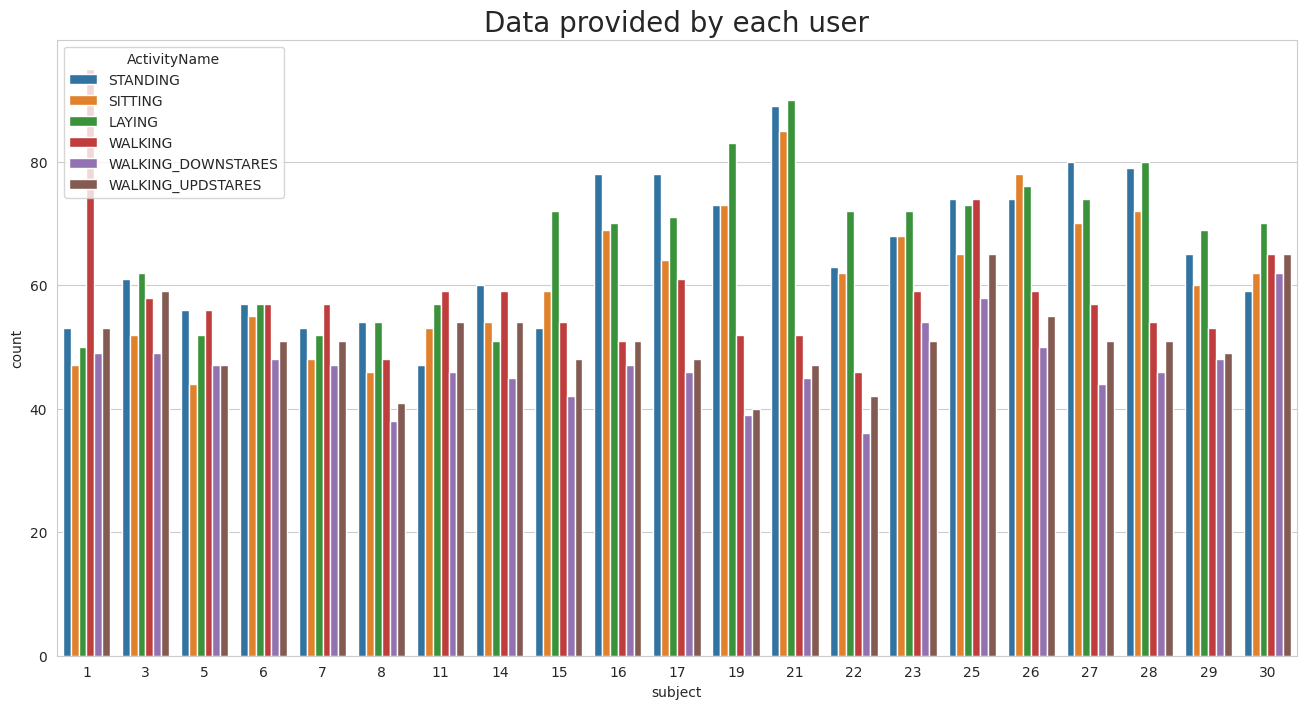

In [16]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName',data=train)
plt.show()

we got almost same number of reading from all the subjects

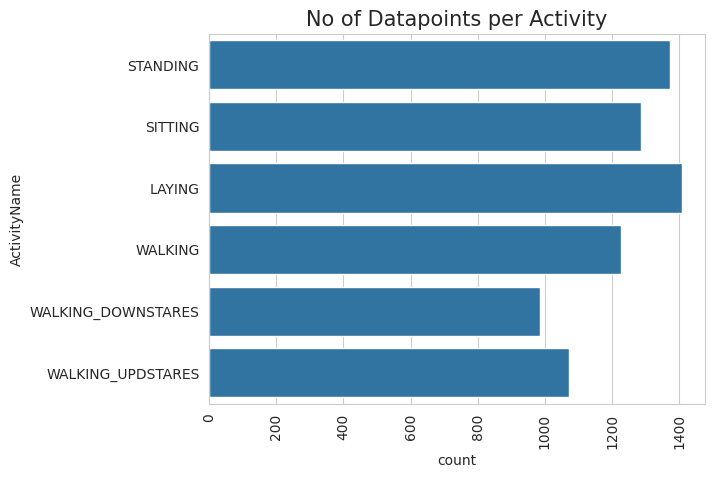

In [17]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

In [18]:
# columns = train.columns

# # Removing '()' from columns names

# columns = columns.str.replace('[()]','')
# columns = columns.str.replace('[.]','')
# columns = columns.str.replace('[,]','')
# columns = columns.str.replace('[-]','')
# train.columns = columns
# test.columns = columns

# train.columns

In [19]:
import re

# Define a regular expression pattern to match all non-alphanumeric characters
pattern = r'[^a-zA-Z0-9]'

# Replace all non-alphanumeric characters in column names with an empty string
train.columns = [re.sub(pattern, '', col) for col in train.columns]
test.columns = [re.sub(pattern, '', col) for col in test.columns]

print(train.columns)


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)


In [20]:
# Assuming df is your DataFrame
columns_starting_with_tBodyAcc = [col for col in train.columns if col.startswith('tBodyAccMag')]
print(columns_starting_with_tBodyAcc)


['tBodyAccMagmean', 'tBodyAccMagstd', 'tBodyAccMagmad', 'tBodyAccMagmax', 'tBodyAccMagmin', 'tBodyAccMagsma', 'tBodyAccMagenergy', 'tBodyAccMagiqr', 'tBodyAccMagentropy', 'tBodyAccMagarCoeff1', 'tBodyAccMagarCoeff2', 'tBodyAccMagarCoeff3', 'tBodyAccMagarCoeff4']


C:\Users\Tejaswi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Tejaswi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

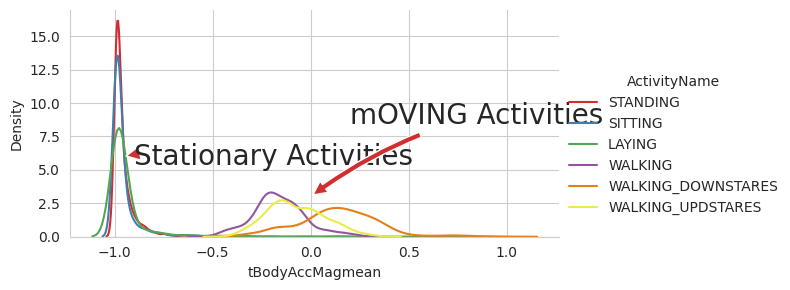

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Set1", desat=0.80)
facegrid = sns.FacetGrid(train, hue='ActivityName',  aspect=2)##size=6,
facegrid.map(sns.distplot,'tBodyAccMagmean',hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,6),xytext =(-0.9,6), size=20,va='center',ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("mOVING Activities", xy=(0,3),xytext =(0.2,9), size=20,va='center',ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.show()

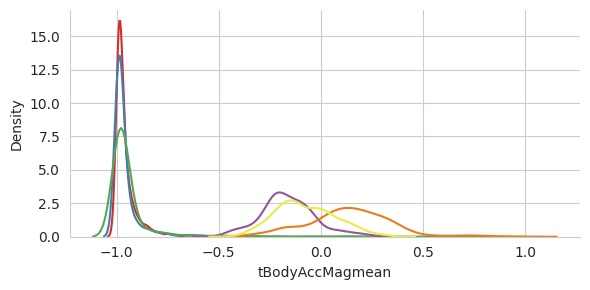

C:\Users\Tejaswi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\Tejaswi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

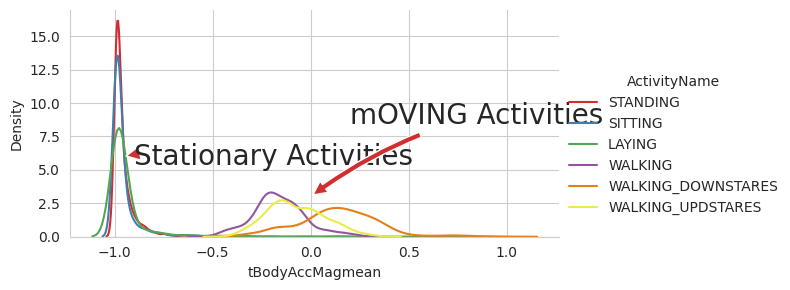

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Set1", desat=0.80)
facegrid = sns.FacetGrid(train, hue='ActivityName', aspect=2)
facegrid.map(sns.kdeplot, 'tBodyAccMagmean')  # No need for hist=False with kdeplot
plt.show()


import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("Set1", desat=0.80)
facegrid = sns.FacetGrid(train, hue='ActivityName',  aspect=2)##size=6,
facegrid.map(sns.distplot,'tBodyAccMagmean',hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,6),xytext =(-0.9,6), size=20,va='center',ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("mOVING Activities", xy=(0,3),xytext =(0.2,9), size=20,va='center',ha='left',arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.show()

In [23]:
# performs t-sne with different perplexity values and their respective plots
from sklearn.manifold import TSNE
def perform_tsne(X_data, y_data, perplexities, n_iter=100, img_name_prefix='t-sme'):
    for index,perplexity in enumerate(perplexities):
        #perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2,perplexity=perplexity).fit_transform(X_data)
        print('Done..')

#prepare the data for seaborn
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1],'label':y_data})
        #draw the plot in apprpriate place in the grid
        sns.lmplot(data=df,x='x',y='y',hue='label',fit_reg=False,height=8,palette="Set1",markers=['^','v','s','o','1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_prep_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')
        



performing tsne with perplexity 2 and with 100 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.017s...
[t-SNE] Computed neighbors for 7352 samples in 0.420s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597464
[t-SNE] Computed conditional probabilities in 0.013s
[t-SNE] Iteration 50: error = 119.3520203, gradient norm = 0.0406956 (50 iterations in 0.896s)
[t-SNE] Iteration 100: error = 105.0419769, gradient norm = 0.0223043 (50 iterations in 0

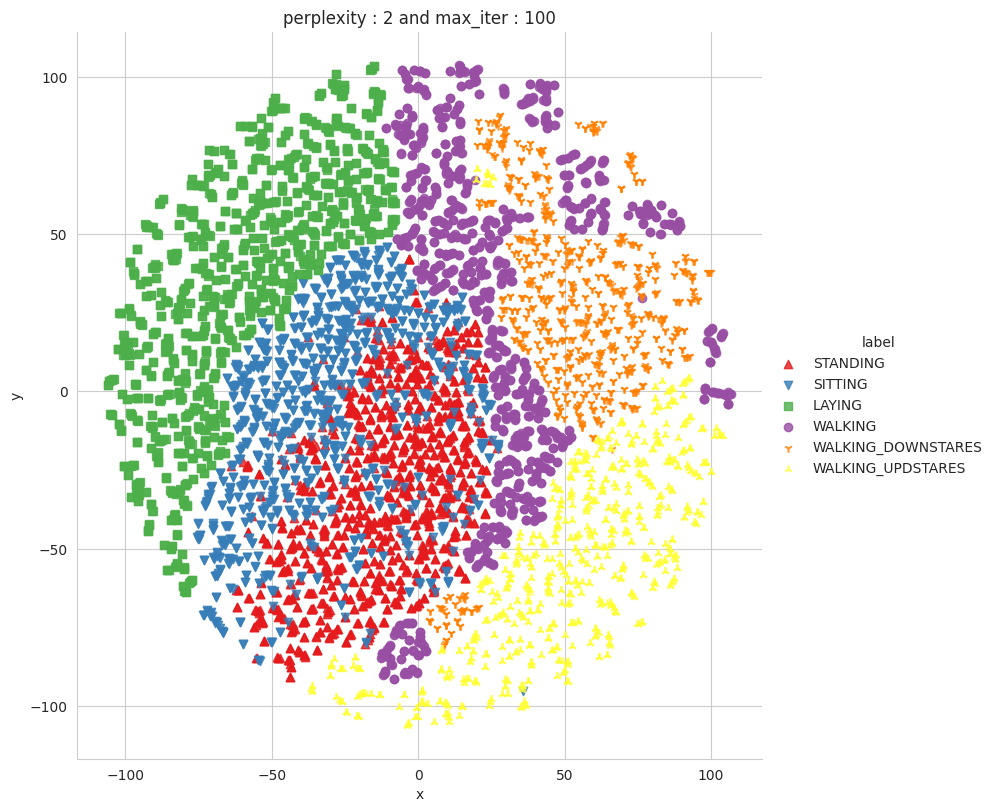

Done

performing tsne with perplexity 5 and with 100 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.020s...
[t-SNE] Computed neighbors for 7352 samples in 0.339s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.025s
[t-SNE] Iteration 50: error = 107.1663055, gradient norm = 0.0406188 (50 iterations in 1.178s)
[t-SNE] Iteration 100: error = 95.6777344, gradient norm = 0.0155710 (50 iterations

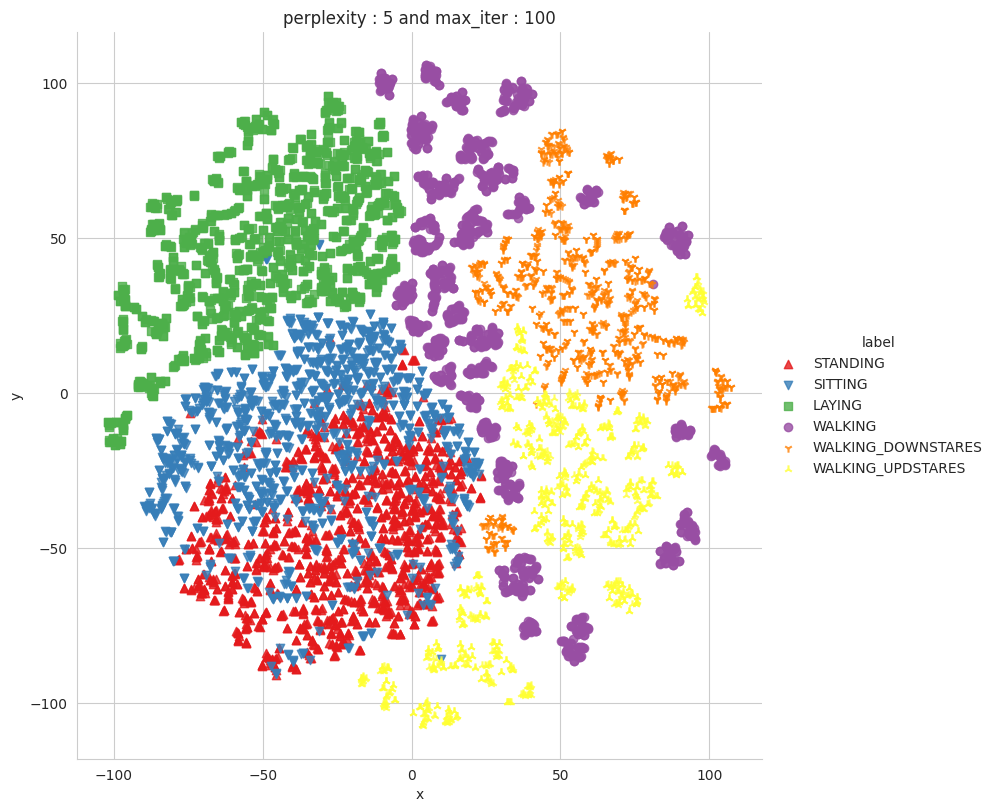

Done

performing tsne with perplexity 10 and with 100 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.037s...
[t-SNE] Computed neighbors for 7352 samples in 0.525s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.056s
[t-SNE] Iteration 50: error = 97.9064407, gradient norm = 0.0345308 (50 iterations in 1.357s)
[t-SNE] Iteration 100: error = 88.9359589, gradient norm = 0.0105146 (50 iterations

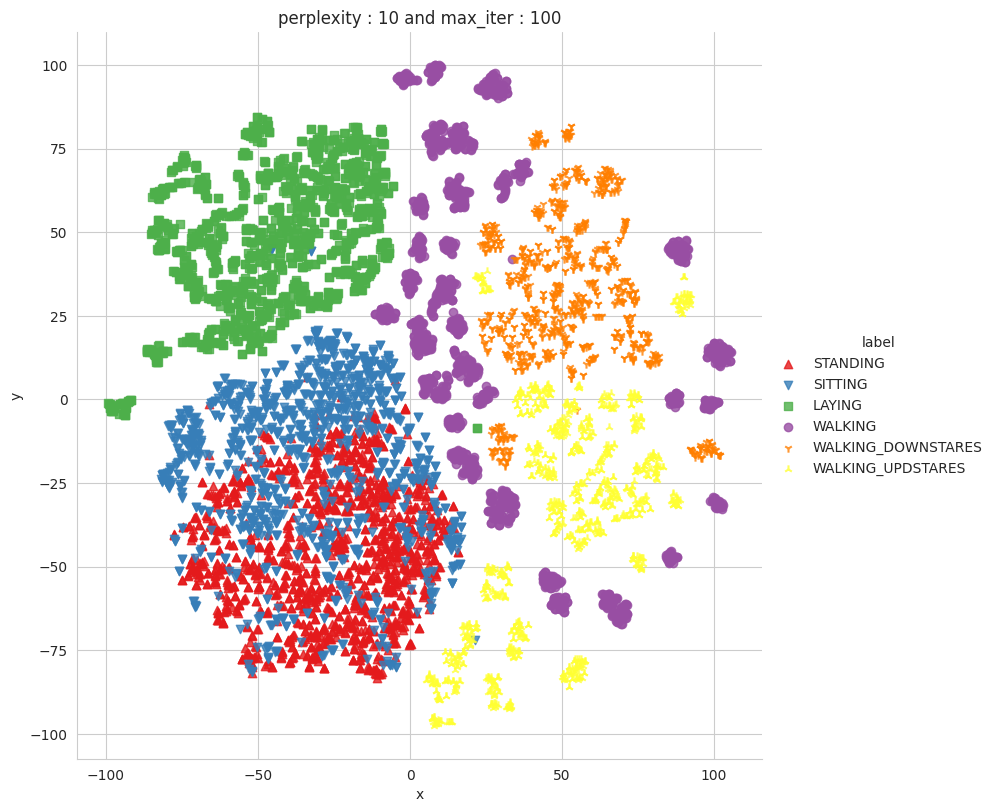

Done

performing tsne with perplexity 20 and with 100 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.035s...
[t-SNE] Computed neighbors for 7352 samples in 0.574s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.107s
[t-SNE] Iteration 50: error = 89.3023300, gradient norm = 0.0301387 (50 iterations in 1.626s)
[t-SNE] Iteration 100: error = 82.9626083, gradient norm = 0.0078234 (50 iterations

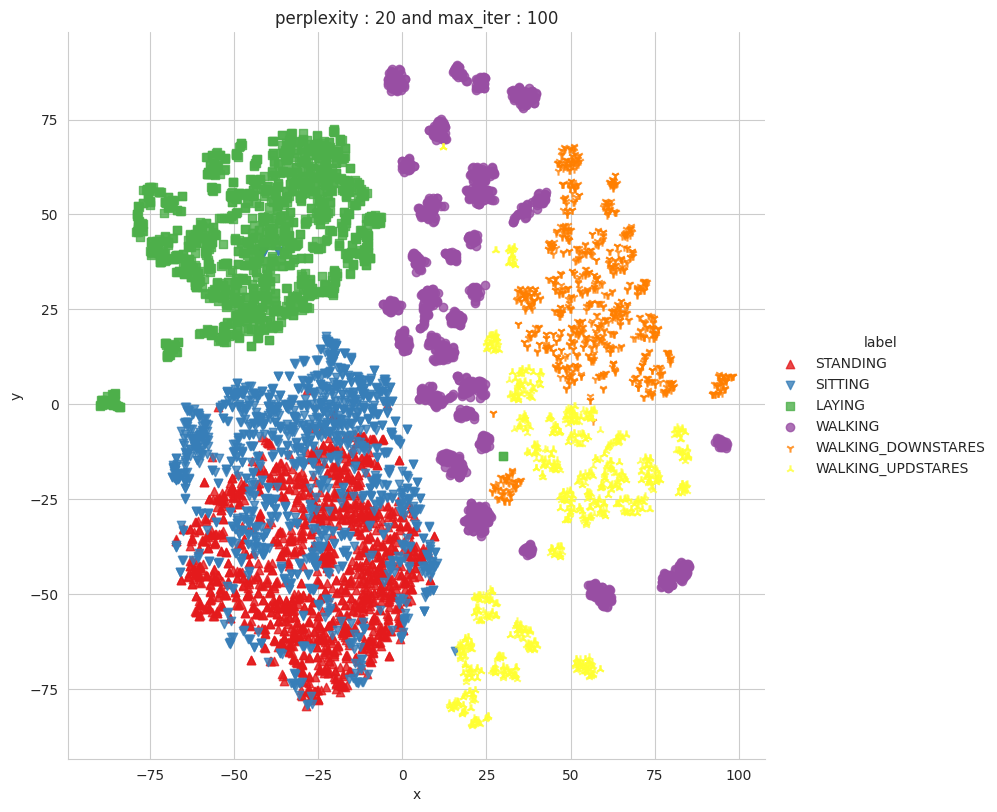

Done

performing tsne with perplexity 50 and with 100 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.016s...
[t-SNE] Computed neighbors for 7352 samples in 0.357s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.203s
[t-SNE] Iteration 50: error = 78.8768082, gradient norm = 0.0237211 (50 iterations in 2.012s)
[t-SNE] Iteration 100: error = 75.2888412, gradient norm = 0.0052599 (50 iteration

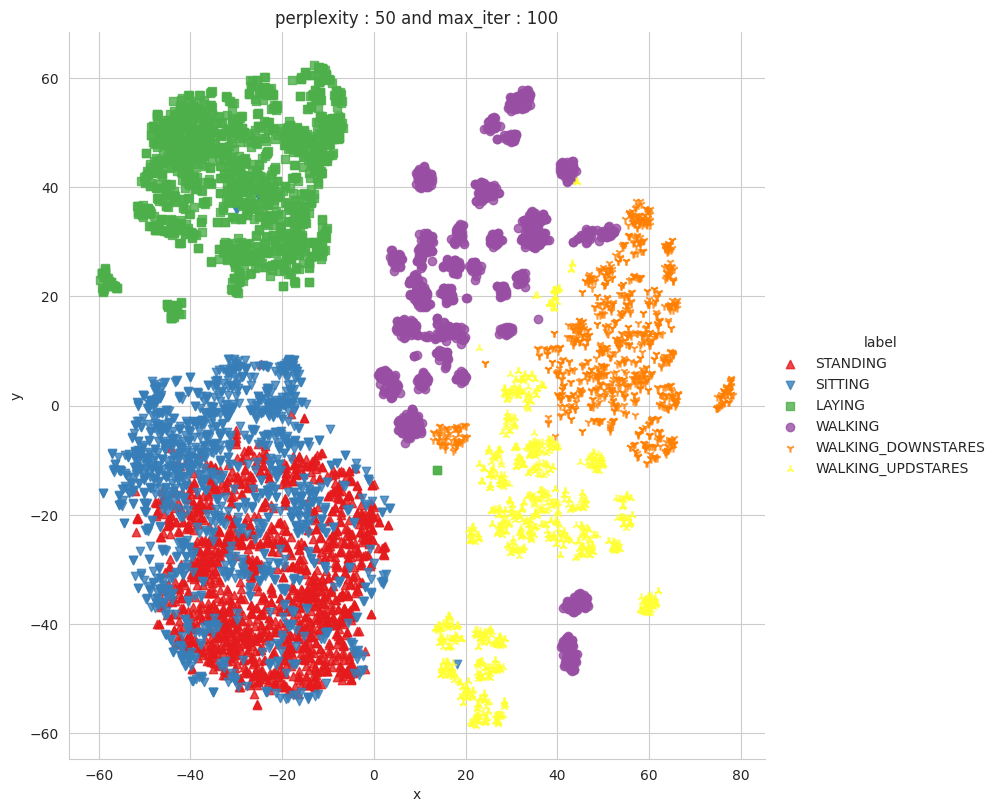

Done


In [24]:
X_pre_tsne = train.drop(['subject','Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne, y_data = y_pre_tsne, perplexities =[2,5,10,20,50])


In [25]:
X_train = train.drop(['subject','Activity','ActivityName'], axis=1)
y_train = train['ActivityName']

X_test = test.drop(['subject','Activity','ActivityName'], axis=1)
y_test = test['ActivityName']


In [26]:
print('shape of X_train and y_train :({},{})'.format(X_train.shape,y_train.shape))

print('shape of X_test and y_test :({},{})'.format(X_test.shape,y_test.shape))


shape of X_train and y_train :((7352, 561),(7352,))
shape of X_test and y_test :((2947, 561),(2947,))


In [27]:
##labelling for plotting confusion matrix

In [28]:
labels=['WALKING','WALKING_UPDSTARES','WALKING_DOWNSTARES','SITTING','STANDING','LAYING']

Function to plot confusion matrix

In [29]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'Dejavu Sans'

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]

    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
            
    



Generic function to run any model specified

In [30]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test,class_labels,cm_normalize=True,print_cm=True,cm_map=plt.cm.Greens):
    #to store results at various phases
    results =dict()

    #time at which model starts training
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train,y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))

    ##predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred

    #calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results

    results['accuracy'] = accuracy
    print('-----------------------')
    print('|       Accuracy       |')
    print('------------------------')
    print('\n    {}\n\n'.format(accuracy))

    #confusion matrix

    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
            print('-----------------------')
            print('|   Confusion Matrix   |')
            print('------------------------')
            print('\n    {}\n\n'.format(cm))

            #plot confusion matrix
    plt.figure(figsize=(8,8))
    # plt.grid(b=False)
    plt.grid()
    plot_confusion_matrix(cm, classes=class_labels, normalize=True,title='Normalized confusion matrix', cmap =cm_map)
    plt.show()

    ##get classification report
    print('-----------------------')
    print('|   Classification Report   |')
    print('------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    #store report in results
    results['classification_report'] = classification_report
    print(classification_report)
            
    #add the trained model to the results
    results['model'] = model

    return results
                    


Method to print grid search attributes

In [31]:
def print_grid_search_attributes(model):
    
    ##Estimator that gave highest score among all the estimators formed in GridSearch
    print('-----------------------')
    print('|       Best Estimator       |')
    print('------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))

    print('-----------------------')
    print('|       Best parameter       |')
    print('------------------------')
    print('\tParameters of best estimator : \n\t{}\n'.format(model.best_params_))


    print('-----------------------')
    print('|       No of CrossValidation sets       |')
    print('------------------------')
    print('\n\tTotal number of cross validation sets : {}\n'.format(model.n_splits_))


    print('-----------------------')
    print('|       Best Score       |')
    print('------------------------')
    print('\n\tAverage Cross Validate scores of best estimator :\n\n\t{}\n'.format(model.best_score_))


Logistic Regression with Grid Search

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


C:\Users\Tejaswi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 36.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tejaswi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tejaswi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Tejasw

Done 
 

training_time(HH:MM:SS.ms) - 0:01:43.877296


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.010003


-----------------------
|       Accuracy       |
------------------------

    0.9630132337970818


-----------------------
|   Confusion Matrix   |
------------------------

    [[537   0   0   0   0   0]
 [  2 434  52   0   0   3]
 [  0  12 519   1   0   0]
 [  0   0   0 493   3   0]
 [  0   0   0   3 409   8]
 [  0   0   0  25   0 446]]




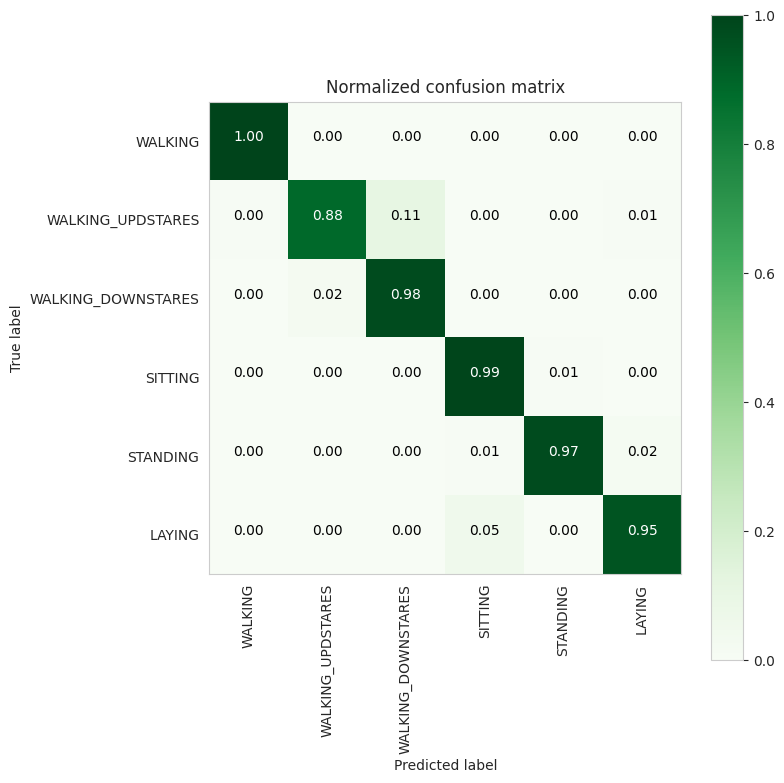

-----------------------
|   Classification Report   |
------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTARES       0.99      0.97      0.98       420
 WALKING_UPDSTARES       0.98      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [32]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
# start Grid Search

parameters = {'C' :[0.01,0.1,1,10,20,30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression(solver='lbfgs',max_iter=1000)
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results = perform_model(log_reg_grid, X_train,y_train,X_test,y_test,class_labels=labels)


In [33]:
#observe attributes of model
print_grid_search_attributes(log_reg_grid_results['model'])

-----------------------
|       Best Estimator       |
------------------------

	LogisticRegression(C=20, max_iter=1000)

-----------------------
|       Best parameter       |
------------------------
	Parameters of best estimator : 
	{'C': 20, 'penalty': 'l2'}

-----------------------
|       No of CrossValidation sets       |
------------------------

	Total number of cross validation sets : 3

-----------------------
|       Best Score       |
------------------------

	Average Cross Validate scores of best estimator :

	0.9427387960488153



Linear SVC with Grid Search

In [34]:
from sklearn.svm import LinearSVC

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\Tejaswi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Tejaswi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Done 
 

training_time(HH:MM:SS.ms) - 0:00:45.575293


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.012002


-----------------------
|       Accuracy       |
------------------------

    0.9674244994910078


-----------------------
|   Confusion Matrix   |
------------------------

    [[537   0   0   0   0   0]
 [  2 433  53   0   0   3]
 [  0  12 519   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]




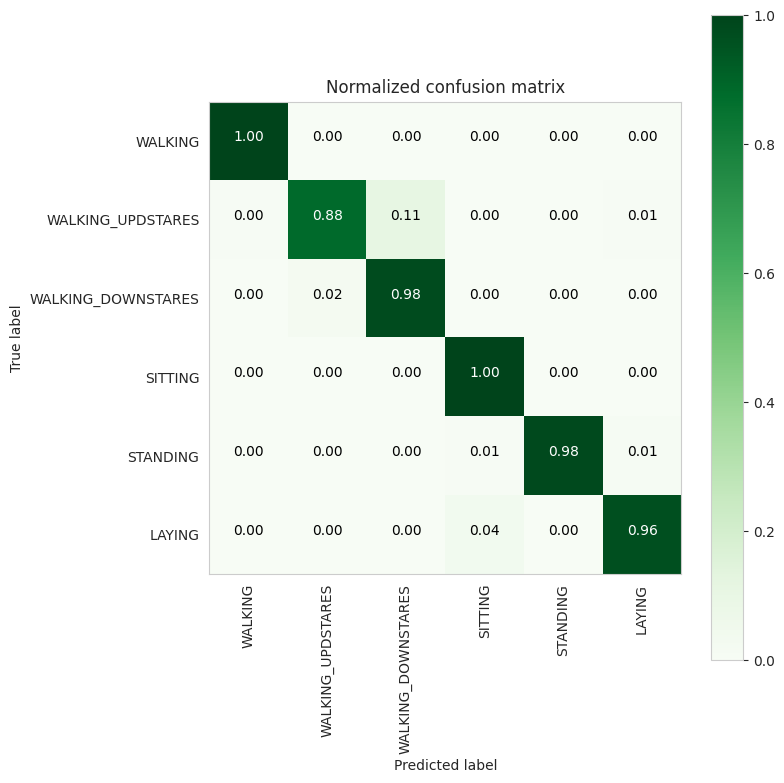

-----------------------
|   Classification Report   |
------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.88      0.93       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTARES       1.00      0.98      0.99       420
 WALKING_UPDSTARES       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [35]:
parameters = {'C':[0.125, 0.5, 1,2,8,16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid = parameters, n_jobs = -1,verbose =1)
lr_svc_grid_results = perform_model(lr_svc_grid,X_train, y_train, X_test, y_test, class_labels=labels)


In [36]:
print_grid_search_attributes(lr_svc_grid_results['model'])

-----------------------
|       Best Estimator       |
------------------------

	LinearSVC(C=0.5, tol=5e-05)

-----------------------
|       Best parameter       |
------------------------
	Parameters of best estimator : 
	{'C': 0.5}

-----------------------
|       No of CrossValidation sets       |
------------------------

	Total number of cross validation sets : 5

-----------------------
|       Best Score       |
------------------------

	Average Cross Validate scores of best estimator :

	0.9419284396287407



Kernal SVM with grid search to resolve sitting accuracy

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:06:06.575106


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.794178


-----------------------
|       Accuracy       |
------------------------

    0.9626739056667798


-----------------------
|   Confusion Matrix   |
------------------------

    [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]




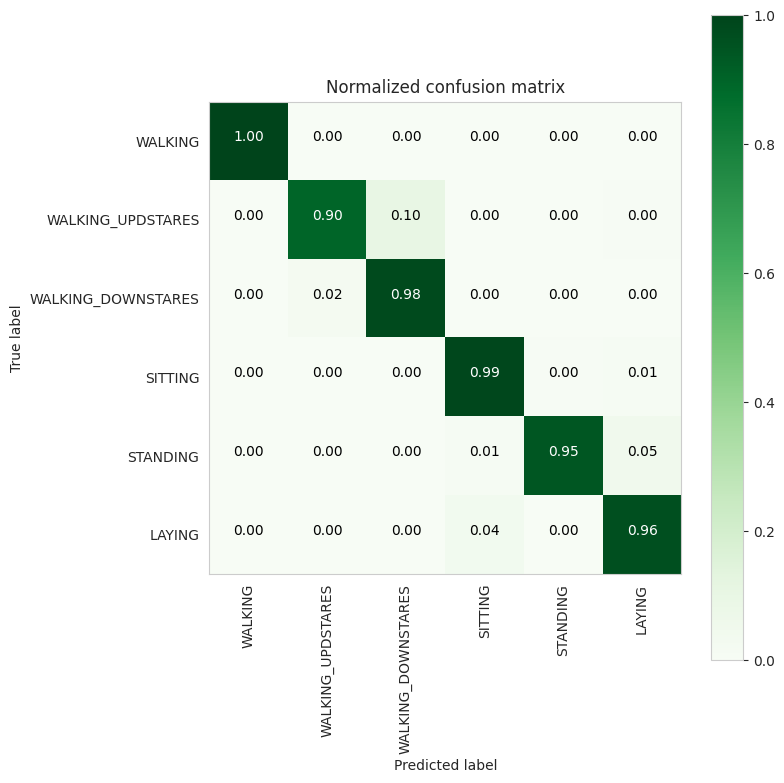

-----------------------
|   Classification Report   |
------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTARES       0.99      0.95      0.97       420
 WALKING_UPDSTARES       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [37]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],'gamma':[0.0078125,0.125,2]}

rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm, param_grid=parameters,n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train,y_train,X_test,y_test,class_labels=labels)

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:13:35.502473


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.871000


-----------------------
|       Accuracy       |
------------------------

    0.9619952494061758


-----------------------
|   Confusion Matrix   |
------------------------

    [[537   0   0   0   0   0]
 [  0 440  49   0   0   2]
 [  0  10 522   0   0   0]
 [  0   0   0 488   2   6]
 [  0   0   0   5 395  20]
 [  0   0   0  16   2 453]]




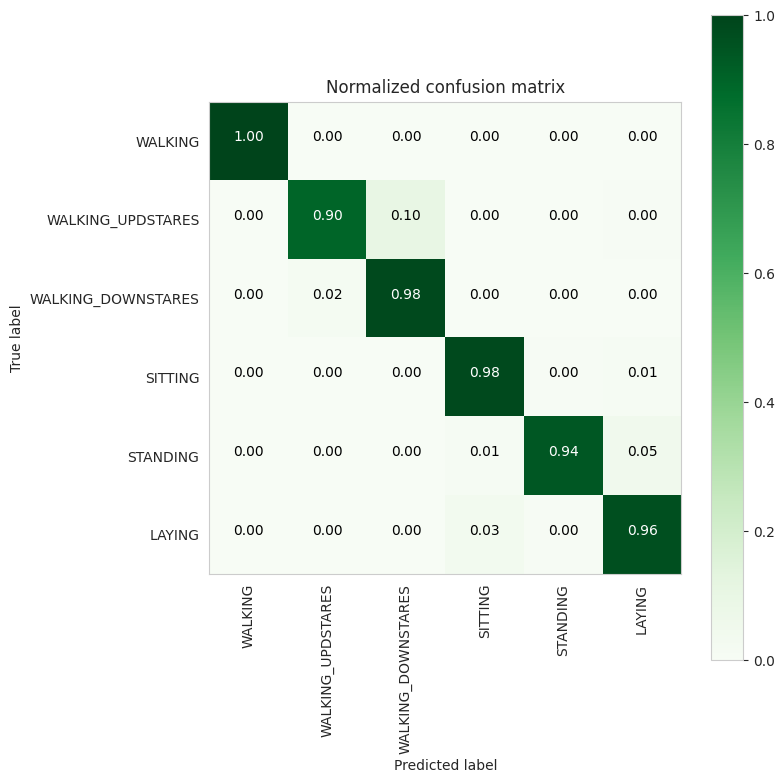

-----------------------
|   Classification Report   |
------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.90      0.94       491
          STANDING       0.91      0.98      0.95       532
           WALKING       0.96      0.98      0.97       496
WALKING_DOWNSTARES       0.99      0.94      0.96       420
 WALKING_UPDSTARES       0.94      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [38]:
parameters = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]}

rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm, param_grid=parameters,n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train,y_train,X_test,y_test,class_labels=labels)


training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:13.733725


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.008081


-----------------------
|       Accuracy       |
------------------------

    0.8693586698337292


-----------------------
|   Confusion Matrix   |
------------------------

    [[537   0   0   0   0   0]
 [  0 369 122   0   0   0]
 [  0  59 473   0   0   0]
 [  0   0   0 473  17   6]
 [  0   0   0  31 345  44]
 [  0   0   0  64  42 365]]




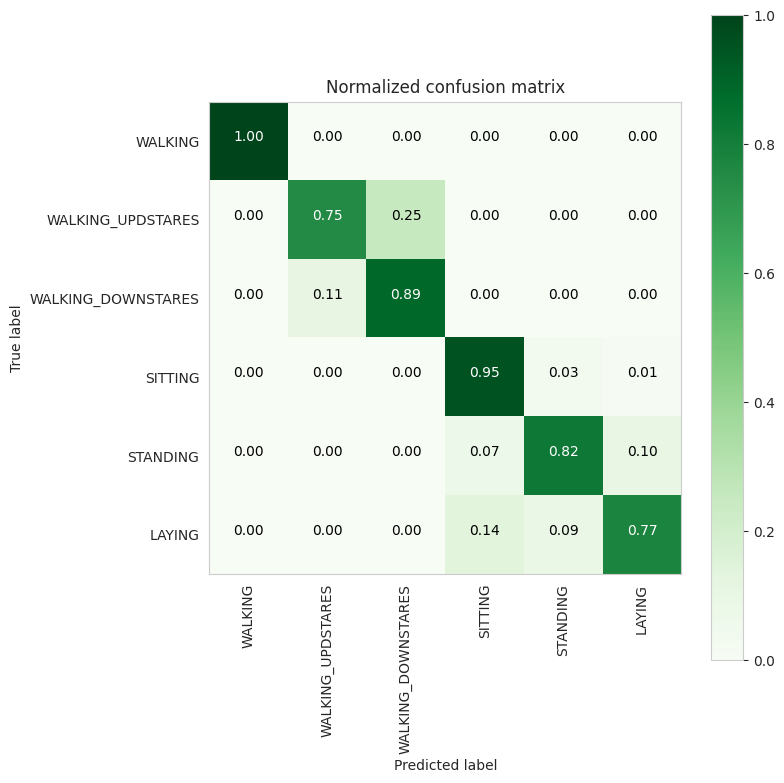

-----------------------
|   Classification Report   |
------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.75      0.80       491
          STANDING       0.79      0.89      0.84       532
           WALKING       0.83      0.95      0.89       496
WALKING_DOWNSTARES       0.85      0.82      0.84       420
 WALKING_UPDSTARES       0.88      0.77      0.82       471

          accuracy                           0.87      2947
         macro avg       0.87      0.87      0.87      2947
      weighted avg       0.87      0.87      0.87      2947

-----------------------
|       Best Estimator       |
------------------------

	DecisionTreeClassifier(max_depth=9)

-----------------------
|       Best parameter       |
------------------------
	Parameters of best estimator : 
	{'max_depth': 9}

-----------------------
|       No of CrossValidation sets       |


In [39]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth' :np.arange(3,10,2)}

dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, param_grid=parameters,n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train,y_train,X_test,y_test,class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

Random Forest Classifier with Grid Search

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:09:32.398684


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.075754


-----------------------
|       Accuracy       |
------------------------

    0.9239904988123515


-----------------------
|   Confusion Matrix   |
------------------------

    [[537   0   0   0   0   0]
 [  0 437  54   0   0   0]
 [  0  41 491   0   0   0]
 [  0   0   0 476   9  11]
 [  0   0   0  19 354  47]
 [  0   0   0  37   6 428]]




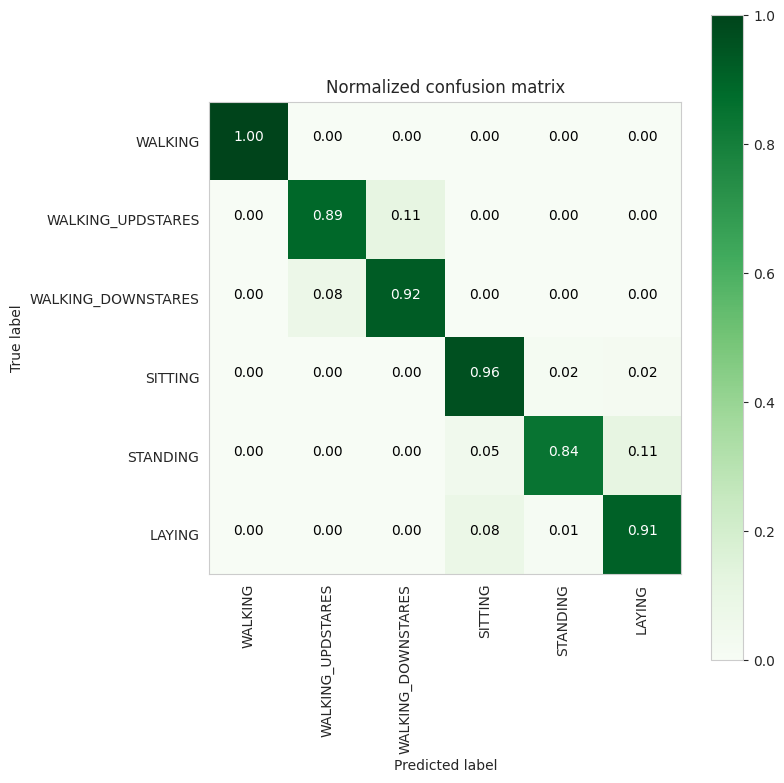

-----------------------
|   Classification Report   |
------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.89      0.96      0.93       496
WALKING_DOWNSTARES       0.96      0.84      0.90       420
 WALKING_UPDSTARES       0.88      0.91      0.89       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.93      0.92      0.92      2947

-----------------------
|       Best Estimator       |
------------------------

	RandomForestClassifier(max_depth=13, n_estimators=170)

-----------------------
|       Best parameter       |
------------------------
	Parameters of best estimator : 
	{'max_depth': 13, 'n_estimators': 170}

-----------------------
| 

In [40]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20),'max_depth' :np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train,y_train,X_test,y_test,class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

Comparing all models

In [41]:
print('\n                        Accuracy      Error')
print('                       -----------  -------')
print('Logistic Regression      : {:.04}%      {:.04}% '.format(log_reg_grid_results['accuracy'] * 100,\
                                                       100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC               : {:.04}%     {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                      100-(lr_svc_grid_results['accuracy'] * 100)))
 
print('rbf SVM classfier        : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                     100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree             : {:.04}%     {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                      100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest            : {:.04}%     {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                      100-(rfc_grid_results['accuracy'] * 100)))


                        Accuracy      Error
                       -----------  -------
Logistic Regression      : 96.3%      3.699% 
Linear SVC               : 96.74%     3.258% 
rbf SVM classfier        : 96.2%      3.8% 
DecisionTree             : 86.94%     13.06% 
Random Forest            : 92.4%     7.601% 


Data

In [42]:
#Data directory
DATADIR = 'UCI_HAR_Dataset'


In [43]:
# Raw data signals
#Signals are from accelerometer and Gyroscope
#The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
#excluding the acceleration due to gravity
#Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]    

In [44]:
#Utility function to read the data from csv file
import pandas as pd
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

#Utility function to laod the load
def load_signals(subset):
    signals_data = []
    for signal in SIGNALS:
        filename = f'/content/drive/MyDrive/CloudyML/HAR_Case_Study/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).values
        )

# Transpose is used to change the dimensionality of the output
# aggregrating the signals by combination of sample/timestep.
# Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data,(1,2,0))

In [45]:
def load_y(subset):
    """
    The objective that we are trying to predict is a interger, from 1 to 6,
    that represent a human activity. We return a binaryu representation of every sample objective as a 6 bits vector using One Hot Encoding
    """

    filename = f'/content/drive/MyDrive/CloudyML/HAR_Case_Study/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]
    return pd.get_dummies(y).values

In [57]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns : X_train, X_test,y_train,y_test
    """

    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train,X_test,y_train,y_test


In [47]:
#Importing Tensorflow

import tensorflow as tf
tf.random.set_seed(42)

In [48]:
#Configuring a session
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)    


Instructions for updating:
non-resource variables are not supported in the long term


In [49]:
#import Keras 
from tensorflow import keras
from keras import backend as K
sess = tf.Session(graph = tf.get_default_graph(), config = session_conf)
# K.set_session(sess)
tf.compat.v1.keras.backend.set_session(sess)

In [50]:
#importing libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


In [51]:
##Initialiizing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [52]:
#Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))
    # 


In [ ]:
#Loading the train and test data/

X_train, X_test,Y_train,Y_test = load_data()

In [54]:
def load_data(subject=None):
    """
    Obtain the dataset from multiple files.
    If subject is None, prompt the user to input the subject.
    Returns : X_train, X_test, y_train, y_test
    """
    if subject is None:
        subject = input("Please enter the subject: ")

    X_train, X_test = load_signals('train', subject), load_signals('test', subject)
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test


In [ ]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(Y_train)
print(timesteps)
print(input_dim)
print(len(X_train))

Defining architecture of LSTM

In [ ]:
#Initiliazing the seuential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

In [ ]:
#Compiliing the model
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
#Training the model

model.fit(X_train,y_train,
          batch_size=batch_size,
          validation_data=(X_test,Y_test),
          epochs=epochs)

In [ ]:
#Confusion matrix
print(confusion_matrix(y_test, model.predict(X_test)))

In [ ]:
score = model.evaluate(X_test,Y_test)

In [ ]:
score

With a simple 2 layer architecture we got 87.47% accuracy and a loss of 0.57 


We can further improve the performance with Hyperparameter tuning